In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [1]:
import sys
sys.path.insert(0, '../')

from hrdtools.segments_data_processor import SegmentsDataProcessor, SegmentsDataProcessor2
from hrdtools.gap_data_processor import GapDataProcessor
from hrdtools.lengths_data_processor import process_lengths_data
from hrdtools.hrd import HRD

In [3]:
pd.set_option('display.max_rows', 1000)

In [4]:
sdp = SegmentsDataProcessor('../data/P6.Inform/I062.007.WGS.Pre_events.txt')

test_data = sdp.get_cnv_segments()

test_data

,Chromosome,Copy Number,Length,Start,End
0,1,1,745087,2789792,3534879
1,1,3,1235764,9453839,10689603
2,1,3,1305426,15793573,17098999
3,1,3,1505876,28045550,29551426
4,1,3,793192,32425081,33218273
5,1,3,1503056,35418511,36921567
6,1,3,933073,144947624,145880697
7,1,3,2363740,149782941,152146681
8,1,3,1277083,155058818,156335901
9,1,1,121233,161518593,161639826


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Chromosome   106 non-null    object
 1   Copy Number  106 non-null    int64 
 2   Length       106 non-null    int64 
 3   Start        106 non-null    int64 
 4   End          106 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.3+ KB


In [6]:
lengths = pd.read_csv('../data/hs37d5.fa.fai', sep='\t', header=None)

In [7]:
lengths = process_lengths_data(lengths)

# data is in good format
lengths

,Length
Chromosome,
1,249250621
2,243199373
3,198022430
4,191154276
5,180915260
6,171115067
7,159138663
8,146364022
9,141213431


In [8]:
gdp = GapDataProcessor('../data/gap.txt')

centromeres = gdp.get_centromeres()

centromeres

,Chromosome,Start,End
0,1,121535434,124535434
1,2,92326171,95326171
2,3,90504854,93504854
3,4,49660117,52660117
4,5,46405641,49405641
5,6,58830166,61830166
6,7,58054331,61054331
7,8,43838887,46838887
8,9,47367679,50367679
9,X,58632012,61632012


### Initializing VCF parser

In [9]:
import vcf

vcf_reader_raw = vcf.Reader(filename='../data/P6.Inform/P13.WES.raw.vcf.gz')
vcf_reader = vcf.Reader(filename='../data/P6.Inform/P13.WES.Discovery.vcf.gz')

### Fill profile by segments with copy number 2

Some constants and parameters:

In [10]:
Mb = 1000000
S_small = 3 * Mb
qual_threshold = 200

In [11]:
# TODO refactoring - count length in this function
def insert_row(df, _chr, cn, length, start, end, index):
    normal_segment = pd.DataFrame({
        'Chromosome': [ _chr ],
        'Copy Number': [ cn ],
        'Length': [length],
        'Start': [ start ],
        'End': [ end ]
    })
                
    return pd.concat([df.iloc[:index], normal_segment, df.iloc[index:]]).reset_index(drop=True)


def fill_segments(data):
    df = data.copy()
    index_df = 0
    normal_cn = 2
    
    for index, row in data.iterrows():
        
        # first cnv region in chromosome
        if index == 0 or data.loc[index-1, 'Chromosome'] != data.loc[index, 'Chromosome']:
            if row['Start'] != 0:
                df = insert_row(df, row['Chromosome'], normal_cn, row['Start'], 0, row['Start'], index_df)
                index_df += 1

        # not first cnv region in chromosome 
        elif data.loc[index-1, 'End'] != data.loc[index, 'Start']:
            prev = data.loc[index-1]

            df = insert_row(df, row['Chromosome'], normal_cn, row['Start'] - prev['End'], prev['End'], row['Start'], index_df)
            index_df += 1

        # last cnv region in chromosome
        if index == len(data) - 1 or data.loc[index+1, 'Chromosome'] != data.loc[index, 'Chromosome']:

            chr_len = lengths.loc[row['Chromosome'], 'Length']
            if row['End'] != chr_len:      
                df = insert_row(df, row['Chromosome'], normal_cn, chr_len - row['End'], row['End'], chr_len, index_df+1)
                index_df += 1

        index_df += 1
        
    return df

In [12]:
filled_data = fill_segments(test_data)

filled_data

,Chromosome,Copy Number,Length,Start,End
0,1,2,2789792,0,2789792
1,1,1,745087,2789792,3534879
2,1,2,5918960,3534879,9453839
3,1,3,1235764,9453839,10689603
4,1,2,5103970,10689603,15793573
5,1,3,1305426,15793573,17098999
6,1,2,10946551,17098999,28045550
7,1,3,1505876,28045550,29551426
8,1,2,2873655,29551426,32425081
9,1,3,793192,32425081,33218273


In [13]:
chromosome_names = [str(_chr) for _chr in range(1, 23)]
chromosome_names.append('X')

In [14]:
# TODO refactoring - get dataframe made by segments of current chromosome and then work with it
def remove_centromeres(data):
    for _chr in chromosome_names:
        centromere_start = centromeres.loc[centromeres['Chromosome'] == _chr, 'Start'].iloc[0]
        centromere_end = centromeres.loc[centromeres['Chromosome'] == _chr, 'End'].iloc[0]
        
        # drop segments that start and end in centromere  
        data = data.drop(data[(data['Chromosome'] == _chr) & (data['Start'] >= centromere_start) & (data['End'] <= centromere_end)].index).reset_index(drop=True)
        
        # cut segment that overlaps centromere from both sides
        row_df = data.loc[(data['Chromosome'] == _chr) & (data['Start'] < centromere_start) & (data['End'] > centromere_end)]
        if not row_df.empty:
            row = row_df.iloc[0]
            data.loc[row.name, 'End'] = centromere_start
            data.loc[row.name, 'Length'] = centromere_start - row['Start']        
            data = insert_row(data, _chr, row['Copy Number'], row['End'] - centromere_end, centromere_end, row['End'], row.name + 1)
        
        # cut segment that ends in centromere  
        end_in_centromere_cond = (data['Chromosome'] == _chr) & (data['End'] >= centromere_start) & (data['End'] <= centromere_end)
        data.loc[end_in_centromere_cond, 'End'] = centromere_start
        data.loc[end_in_centromere_cond, 'Length'] = centromere_start - data.loc[end_in_centromere_cond, 'Start']

        # cut segment that starts in centromere  
        start_in_centromere_cond = (data['Chromosome'] == _chr) & (data['Start'] >= centromere_start) & (data['Start'] <= centromere_end)
        data.loc[start_in_centromere_cond, 'Start'] = centromere_end
        data.loc[start_in_centromere_cond, 'Length'] = data.loc[start_in_centromere_cond, 'End'] - centromere_end
    
    return data

In [15]:
data_without_centromeres = remove_centromeres(filled_data)

data_without_centromeres

,Chromosome,Copy Number,Length,Start,End
0,1,2,2789792,0,2789792
1,1,1,745087,2789792,3534879
2,1,2,5918960,3534879,9453839
3,1,3,1235764,9453839,10689603
4,1,2,5103970,10689603,15793573
5,1,3,1305426,15793573,17098999
6,1,2,10946551,17098999,28045550
7,1,3,1505876,28045550,29551426
8,1,2,2873655,29551426,32425081
9,1,3,793192,32425081,33218273


In [16]:
def name_chr_arms(data):
    data['Arm'] = 'p'
    for _chr in chromosome_names:
        centromere_end = centromeres.loc[centromeres['Chromosome'] == _chr, 'End'].iloc[0]

        data.loc[(data['Chromosome'] == _chr) & (data['Start'] >= centromere_end), 'Arm'] = 'q'
        
    return data

In [17]:
data_with_named_arms = name_chr_arms(data_without_centromeres)

data_with_named_arms

,Chromosome,Copy Number,Length,Start,End,Arm
0,1,2,2789792,0,2789792,p
1,1,1,745087,2789792,3534879,p
2,1,2,5918960,3534879,9453839,p
3,1,3,1235764,9453839,10689603,p
4,1,2,5103970,10689603,15793573,p
5,1,3,1305426,15793573,17098999,p
6,1,2,10946551,17098999,28045550,p
7,1,3,1505876,28045550,29551426,p
8,1,2,2873655,29551426,32425081,p
9,1,3,793192,32425081,33218273,p


### Counting DNA index

In [18]:
def count_dna_index(data):
    cns = list(data['Copy Number'])
    weights = list(data['Length'])
    normal_cn = 2
    
    for _chr in chromosome_names:
        chr_segments = data[data['Chromosome'] == _chr]
        if chr_segments.empty:
            centromere_start = centromeres.loc[centromeres['Chromosome'] == _chr, 'Start'].iloc[0]
            centromere_end = centromeres.loc[centromeres['Chromosome'] == _chr, 'End'].iloc[0]
            chromosome_end = lengths.loc[_chr, 'Length']

            cns.extend([normal_cn, normal_cn])
            weights.extend([centromere_start, chromosome_end - centromere_end])

    cn_avg = np.average(cns, weights=weights)
    dna_index = cn_avg / 2

    return dna_index

In [19]:
dna_index = count_dna_index(data_with_named_arms)

dna_index

0.9866206873106315

### Estimating number of chromosomes

Estimating number of chromosomes by taking one segment adjacent with centromere for each chromosome arm. If segment is longer than 1.5 Mb then copy number of that segment is added to the sum, else average copy number of arm is added.

In [20]:
pericentric_seg_treshold = 1.5 * Mb

def count_arm_avg_cn(arm_data):
    cns = list(arm_data['Copy Number'])
    weights = list(arm_data['Length'])
    
    return np.average(cns, weights=weights)


# estimate chromosome number for p arm
def estimate_p_arm(chr_segments):
    p_arm_data = chr_segments.loc[chr_segments['Arm'] == 'p']
    last_segment_p = p_arm_data.iloc[-1]
    if last_segment_p['Length'] >= pericentric_seg_treshold:
        return last_segment_p['Copy Number']
    else:
        return count_arm_avg_cn(p_arm_data)
    
    
# estimate chromosome number for q arm    
def estimate_q_arm(chr_segments):
    q_arm_data = chr_segments.loc[chr_segments['Arm'] == 'q']
    first_segment_q = q_arm_data.iloc[0]
    if first_segment_q['Length'] >= pericentric_seg_treshold:
        return first_segment_q['Copy Number']
    else:
        return count_arm_avg_cn(q_arm_data)


def estimate_chromosome_number(data):
    chromosome_number = 0

    for _chr in chromosome_names:
        chr_segments = data[data['Chromosome'] == _chr]
        
        # if there are no CNVs in whole chromosome add 2 for p and q arm to sum
        if chr_segments.empty:
            normal_cn = 2
            
            chromosome_number += normal_cn + normal_cn
            continue

        chromosome_number += estimate_p_arm(chr_segments)
        chromosome_number += estimate_q_arm(chr_segments)        
                    
    return chromosome_number

In [21]:
chromosome_number = estimate_chromosome_number(data_with_named_arms)

chromosome_number

91.31828457204318

#### Version 2

Estimating number of chromosomes by taking all segments overlaping 1 Mb region adjacent with centromere for each chromosome arm. If there is segment in region longer than 1.5 Mb then copy number of that segment is added to the sum, else average copy number of arm is added.

In [22]:
pericentric_region = 1 * Mb
pericentric_seg_treshold = 1.5 * Mb

# estimate chromosome number for p arm
def estimate_p_arm2(chromosome, chr_segments):
    centromere_start = centromeres.loc[centromeres['Chromosome'] == chromosome, 'Start'].iloc[0]
    p_arm_data = chr_segments.loc[chr_segments['Arm'] == 'p']
    pericentric_segments = p_arm_data.loc[p_arm_data['End'] > centromere_start - pericentric_region]
    long_pericentric_segment = pericentric_segments.loc[pericentric_segments['Length'] > pericentric_seg_treshold]
    if not long_pericentric_segment.empty:
        long_pericentric_segment = long_pericentric_segment.iloc[0]
        return long_pericentric_segment['Copy Number']
    else:
        return count_arm_avg_cn(p_arm_data)

# estimate chromosome number for q arm    
def estimate_q_arm2(chromosome, chr_segments):
    centromere_end = centromeres.loc[centromeres['Chromosome'] == chromosome, 'End'].iloc[0]
    q_arm_data = chr_segments.loc[chr_segments['Arm'] == 'q']
    pericentric_segments = q_arm_data.loc[q_arm_data['Start'] < centromere_end + pericentric_region]
    long_pericentric_segment = pericentric_segments.loc[pericentric_segments['Length'] > pericentric_seg_treshold]
    if not long_pericentric_segment.empty:
        long_pericentric_segment = long_pericentric_segment.iloc[0]
        return long_pericentric_segment['Copy Number']
    else:
        return count_arm_avg_cn(q_arm_data)


def estimate_chromosome_number2(data):
    chromosome_number = 0

    for _chr in chromosome_names:
        chr_segments = data[data['Chromosome'] == _chr]
        
        # if there are no CNVs in whole chromosome add 2 for p and q arm to sum
        if chr_segments.empty:
            normal_cn = 2
            
            chromosome_number += normal_cn + normal_cn
            continue

        chromosome_number += estimate_p_arm2(_chr, chr_segments)
        chromosome_number += estimate_q_arm2(_chr, chr_segments)        
                    
    return chromosome_number

In [23]:
chromosome_number2 = estimate_chromosome_number2(data_with_named_arms)

chromosome_number2

92.7782908147859

### Counting number of variants for each segment

Quality check that filters out records their characteristics don't meet requirements. If characteristics are not present, record remains.

In [24]:
def has_quality(record):
    info = record.INFO
    return record.QUAL > qual_threshold and ('QD' not in info.keys() or info['QD'] > 10.0) and ('MQ' not in info.keys() or info['MQ'] > 40.0) \
        and ('FS' not in info.keys() or info['FS'] < 30.0 ) and ('SOR' not in info.keys() or info['SOR'] < 3.0) \
        and ('MQRankSum' not in info.keys() or info['MQRankSum'] > -12.5) and ('ReadPosRankSum' not in info.keys() or info['ReadPosRankSum'] > -8.0)

In [25]:
def count_variants(data, vcf_reader, sample):
    filled_variants_data = data.copy()
    filled_variants_data['Variants Count per Mb'] = 0

    for index, row in filled_variants_data.iterrows():
        
        segment_records = None
        try:
            segment_records = vcf_reader.fetch(row['Chromosome'], row['Start'], row['End'])
        except ValueError:
            continue
        
        count = 0
        for record in segment_records:
            sample_data = record.genotype(sample).data

            if has_quality(record) and sample_data.GT != './.' and sample_data.GT != '0/0' and sample_data.AD != None and sample_data.AD[1] != 0:
                count += 1

        length_mb = filled_variants_data.loc[index, 'Length'] / 1000000
        filled_variants_data.loc[index, 'Variants Count per Mb'] = count / length_mb

    return filled_variants_data

In [26]:
filled_variants_data = count_variants(data_with_named_arms, vcf_reader_raw, 'I062_007.C')

filled_variants_data

,Chromosome,Copy Number,Length,Start,End,Arm,Variants Count per Mb
0,1,2,2789792,0,2789792,p,23.299228
1,1,1,745087,2789792,3534879,p,17.447627
2,1,2,5918960,3534879,9453839,p,11.319556
3,1,3,1235764,9453839,10689603,p,2.427648
4,1,2,5103970,10689603,15793573,p,8.816666
5,1,3,1305426,15793573,17098999,p,44.429941
6,1,2,10946551,17098999,28045550,p,17.631124
7,1,3,1505876,28045550,29551426,p,11.289110
8,1,2,2873655,29551426,32425081,p,5.219833
9,1,3,793192,32425081,33218273,p,3.782186


### Some visualizations

In [27]:
def plot_chromosomes_variant_count(data):
    fig,axs = plt.subplots(nrows=12, ncols=2, figsize=(15, 40), constrained_layout=True)
    max_count = data['Variants Count per Mb'].max()

    for index, name in enumerate(chromosome_names):
        chr_data = data[data['Chromosome'] == name]
        chr_data = chr_data.reset_index(drop=True)

        ax = axs[index // 2, index % 2]
        ax.set_ylim([0, max_count + 10])
        ax.set_title('Variant counts - chromosome ' + name, fontdict={'fontsize': 16})
        ax.bar(chr_data.index, chr_data['Variants Count per Mb'])

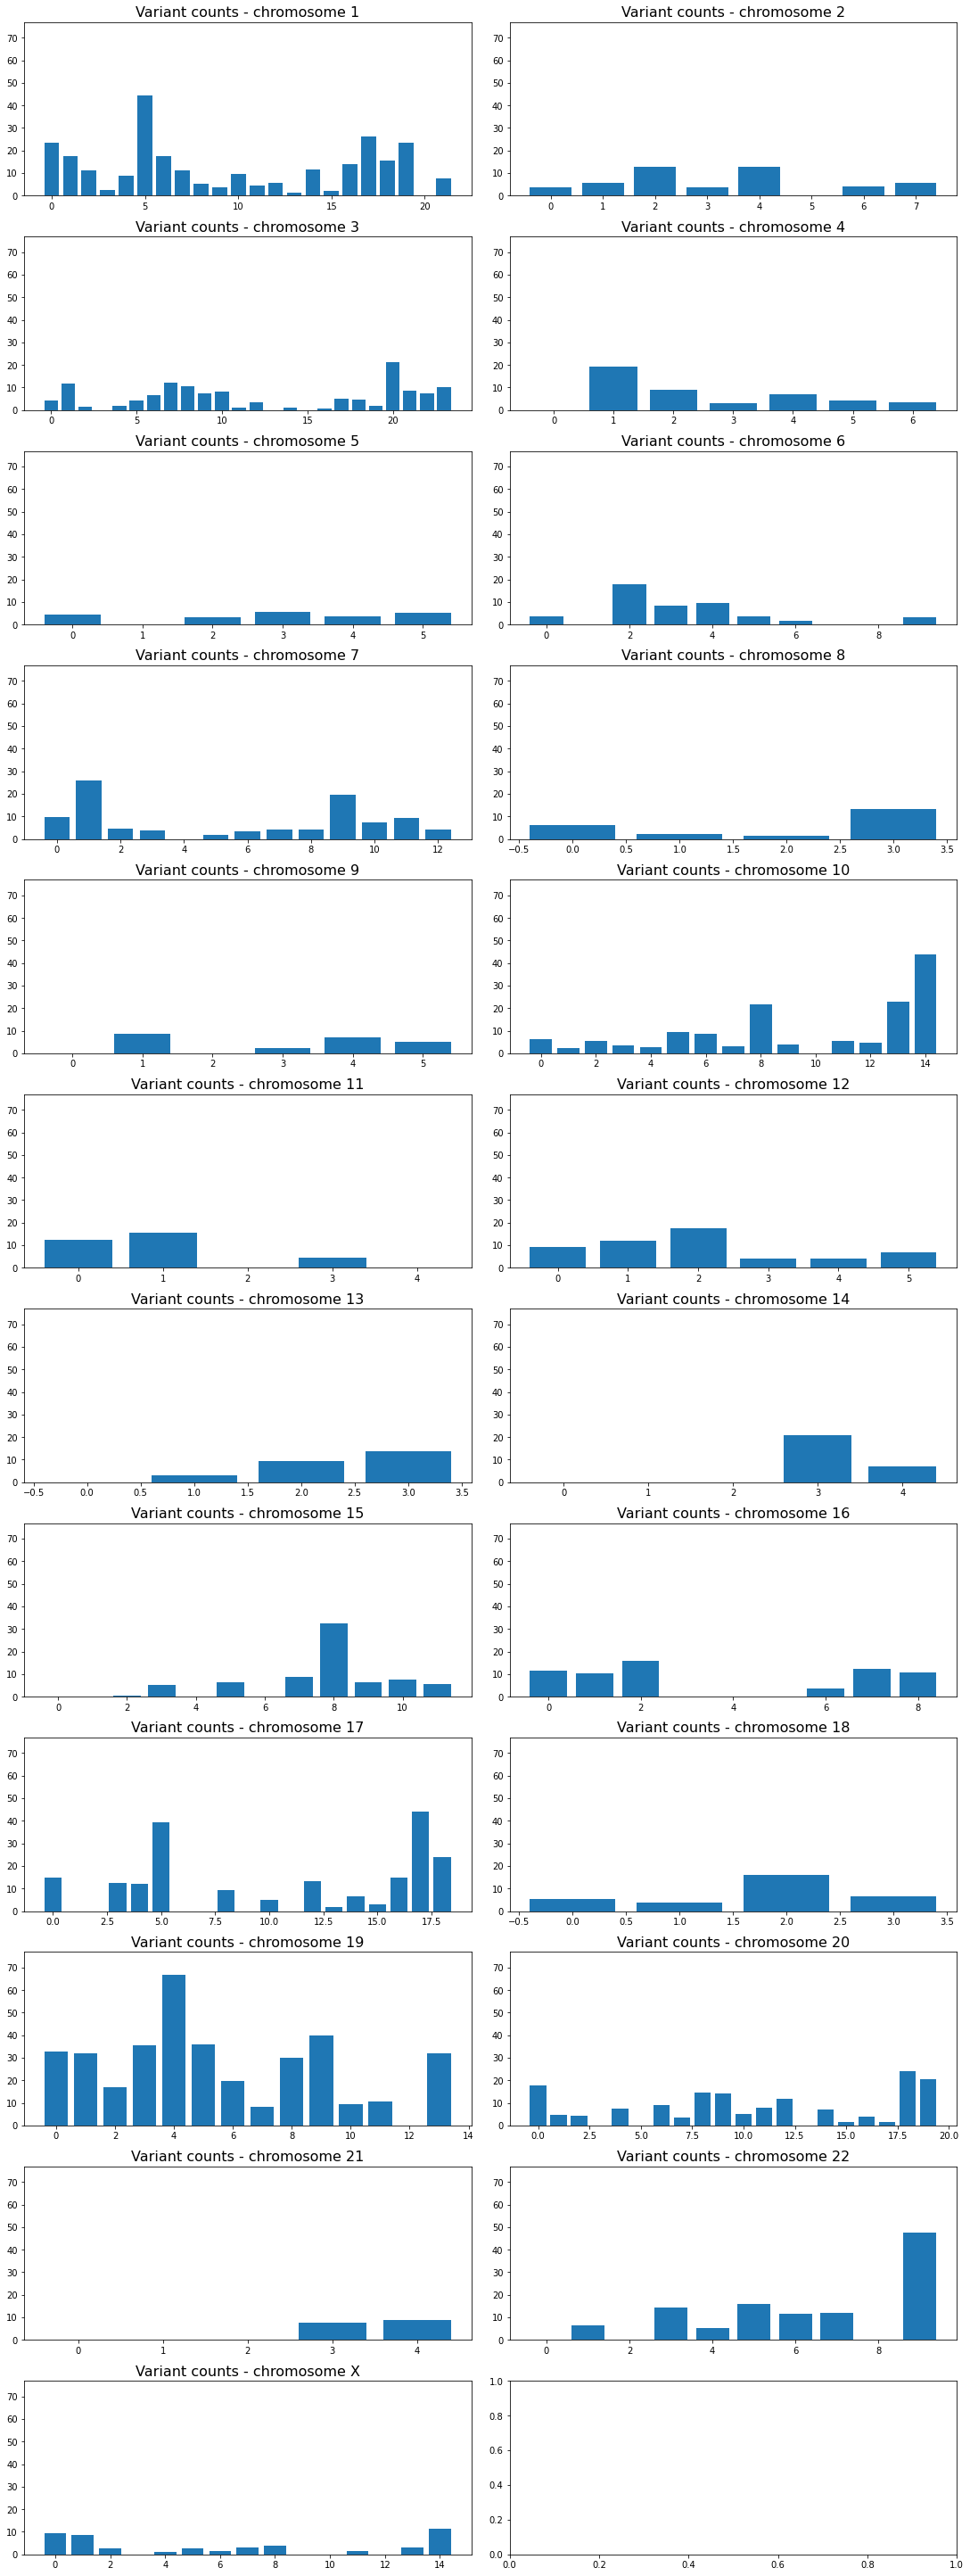

In [28]:
plot_chromosomes_variant_count(filled_variants_data)

In [29]:
def plot_genome_variant_counts(data):
    max_count = data['Variants Count per Mb'].max()
    yticks = [i for i in range(0, int(max_count) + 10, 5)]

    plt.figure(figsize=(20, 10))
    plt.yticks(ticks=yticks)
    plt.title('Variant counts', fontdict={'fontsize': 16})
    plt.bar(data.index, data['Variants Count per Mb'])

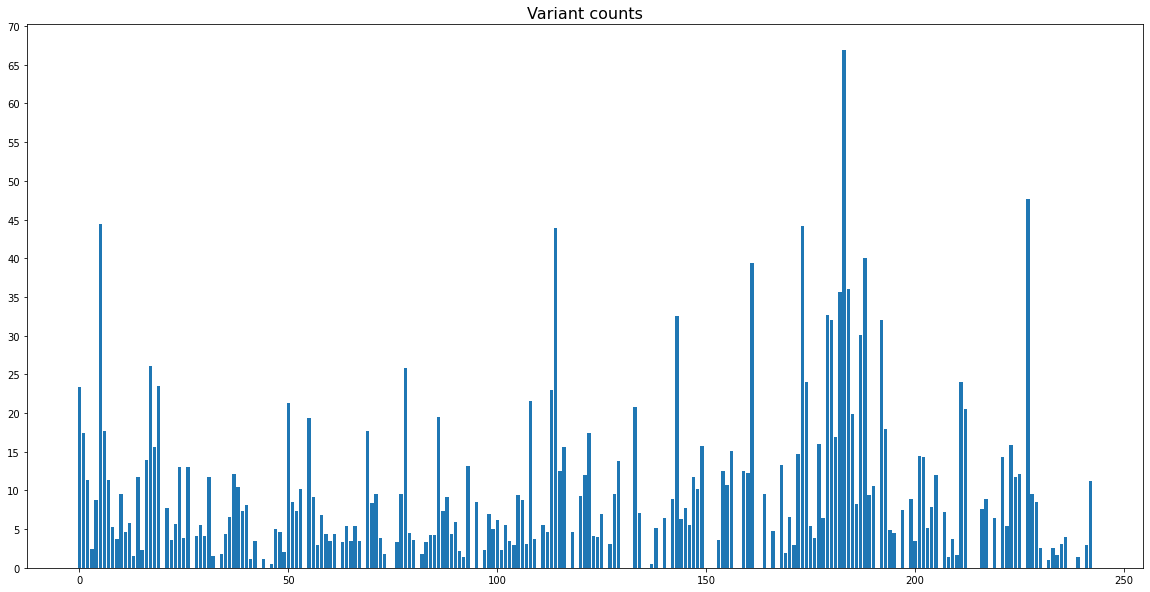

In [30]:
plot_genome_variant_counts(filled_variants_data)

### Segments sorted by number of variants

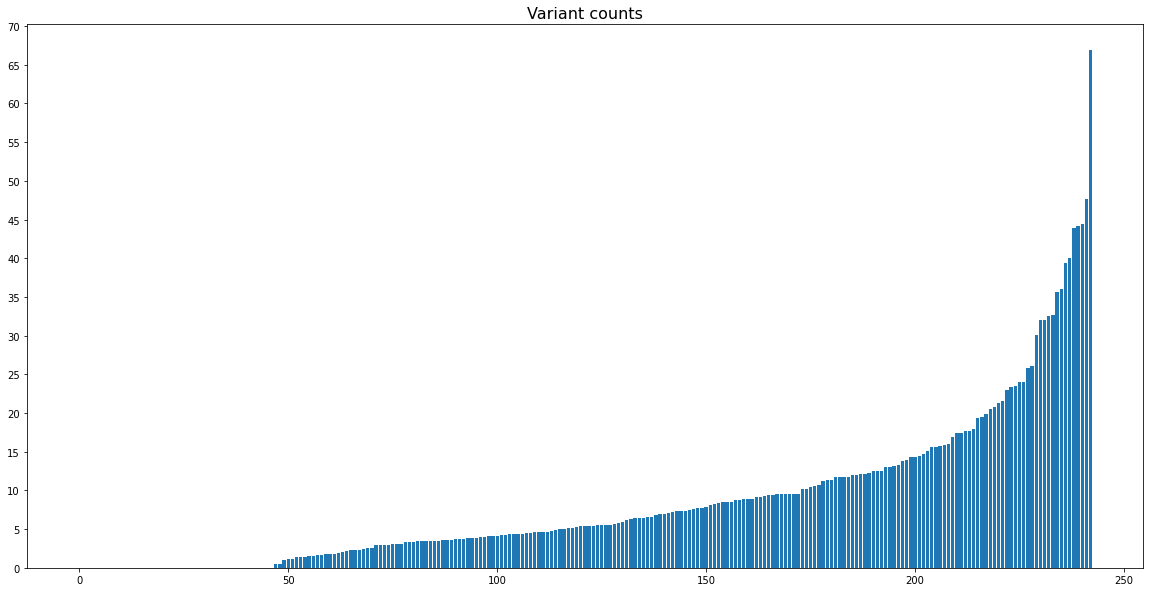

In [31]:
sorted_filled_variants_data = filled_variants_data.sort_values(by=['Variants Count per Mb']).reset_index()

plot_genome_variant_counts(sorted_filled_variants_data)

In [32]:
def plot_histogram(data):
    max_value = data['Variants Count per Mb'].max()
    xticks = [i for i in range(0, int(max_value) + 10, 4)]
    plt.figure(figsize=(20,10))
    plt.hist(data['Variants Count per Mb'], bins=int(data['Variants Count per Mb'].max()) // 2)
    plt.title('Histogram of variants count values', fontdict={'fontsize': 16})
    plt.xticks(ticks=xticks)

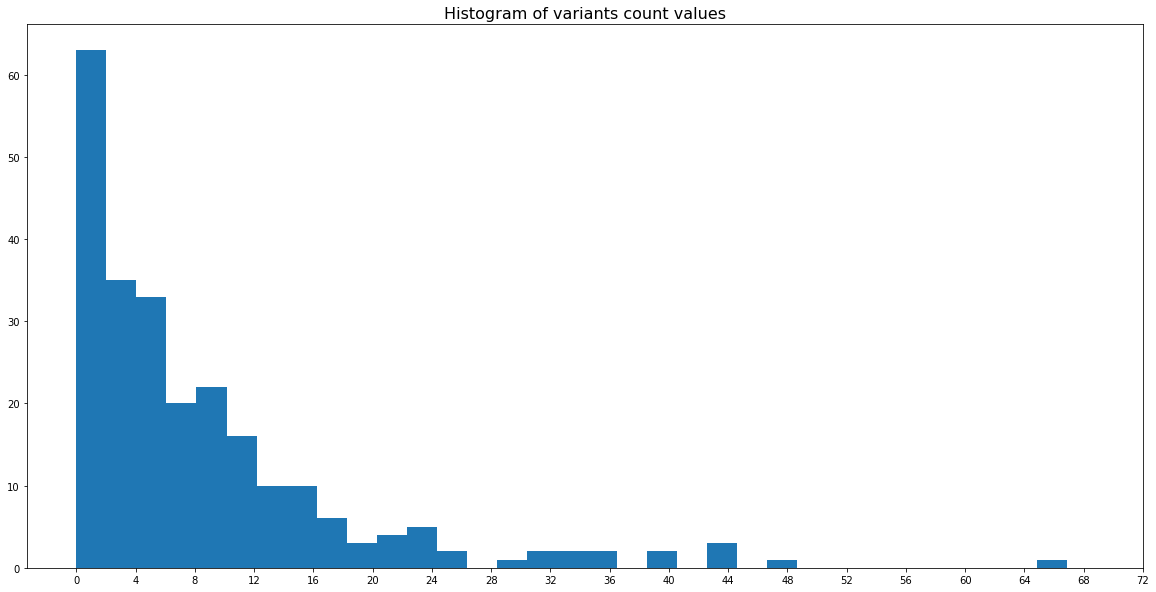

In [33]:
plot_histogram(filled_variants_data)

### Counting allele frequencies for each segment

In [34]:
def count_allele_freqs(data, vcf_reader, sample):
    data_with_af = data.copy()
    data_with_af['Allele Frequencies'] = [list() for x in range(len(data_with_af.index))]

    for index, row in data_with_af.iterrows():

        try:
            segment_records = vcf_reader.fetch(row['Chromosome'], row['Start'], row['End'])
            
            allele_freqs = []
            for record in segment_records:
                sample_data = record.genotype(sample).data

                if has_quality(record) and sample_data.GT != './.' and sample_data.GT != '0/0' and sample_data.AD != './.' and sample_data.AD != None \
                    and sample_data.AD[1] != 0:

                    allele_freq = sample_data.AD[1] / (sample_data.AD[0] + sample_data.AD[1])
                    allele_freqs.append(allele_freq)
            
            data_with_af.at[index, 'Allele Frequencies'] = allele_freqs

        except (ValueError, AttributeError) as e:
            continue
        
    return data_with_af

In [35]:
data_with_af = count_allele_freqs(data_with_named_arms, vcf_reader_raw, 'I062_007.C')

data_with_af

,Chromosome,Copy Number,Length,Start,End,Arm,Allele Frequencies
0,1,2,2789792,0,2789792,p,"[1.0, 0.4878048780487805, 1.0, 1.0, 1.0, 1.0, ..."
1,1,1,745087,2789792,3534879,p,"[0.4772727272727273, 0.4723926380368098, 0.425..."
2,1,2,5918960,3534879,9453839,p,"[1.0, 0.4975845410628019, 1.0, 1.0, 1.0, 1.0, ..."
3,1,3,1235764,9453839,10689603,p,"[0.45, 0.42857142857142855, 1.0]"
4,1,2,5103970,10689603,15793573,p,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
5,1,3,1305426,15793573,17098999,p,"[0.4484536082474227, 0.5202020202020202, 0.461..."
6,1,2,10946551,17098999,28045550,p,"[0.9908256880733946, 0.6111111111111112, 0.341..."
7,1,3,1505876,28045550,29551426,p,"[1.0, 1.0, 1.0, 1.0, 0.4666666666666667, 0.479..."
8,1,2,2873655,29551426,32425081,p,"[1.0, 1.0, 1.0, 1.0, 0.5726495726495726, 0.593..."
9,1,3,793192,32425081,33218273,p,"[0.41304347826086957, 1.0, 1.0]"


### Coercing and counting of LSTs based on copy numbers and allelic frequencies

In [36]:
# insert new segment that was created by linking 
def insert_row_with_af(df, _chr, cn, length, start, end, allele_freqs, arm, index):
    normal_segment = pd.DataFrame({
        'Chromosome': [ _chr ],
        'Copy Number': [ cn ],
        'Length': [length],
        'Start': [ start ],
        'End': [ end ],
        'Allele Frequencies': [allele_freqs],
        'Arm': [arm]
    })
                
    return pd.concat([df.iloc[:index], normal_segment, df.iloc[index:]]).reset_index(drop=True)


# linking adjacent segments of small filtered out segment 
def link_segments(df, prev, _next, small):
    df = df.drop(index=prev.name)
    df = df.drop(index=_next.name)
    
    new_allele_freqs = []
    new_allele_freqs.extend(prev['Allele Frequencies'])
    new_allele_freqs.extend(_next['Allele Frequencies'])
    new_allele_freqs.extend(small['Allele Frequencies'])
    
    df = insert_row_with_af(df, prev['Chromosome'], prev['Copy Number'],  _next['End'] - prev['Start'],  prev['Start'], _next['End'], new_allele_freqs, \
                            prev['Arm'], prev.name)
    
    return df


# statistical tests for equality of allelic frequencies for two segments
def have_equal_allele_freqs(segment1, segment2):
    alpha = 0.05
    min_n = 3
    
    allele_freqs1 = segment1['Allele Frequencies']
    allele_freqs2 = segment2['Allele Frequencies']
    
    # check if there is sufficient number of observations, if no, segments are compared only by copy number
    if len(allele_freqs1) < min_n and len(allele_freqs2) < min_n:
        return True
    
    if len(allele_freqs1) < min_n or len(allele_freqs2) < min_n:
        return False
    
    statistic, p_value = stats.ttest_ind(allele_freqs1, allele_freqs2, equal_var=False)
    
    if p_value > alpha:
        return True
    
    return False


# coercing function
def coercing(data):
    df = data.copy()

    while len(df) > 0:

        # get smallest segment
        row = df[df['Length'] == df['Length'].min()].iloc[0]
        index = row.name

        # filter out?
        if row['Length'] < S_small:

            # not first or last segment of profile?
            if index != 0 and index != len(df) - 1:
                prev = df.loc[ index-1 ]
                _next = df.loc[ index+1 ]

                # can link?
                if prev['Chromosome'] == _next['Chromosome'] and prev['Arm'] == _next['Arm'] and prev['Copy Number'] == _next['Copy Number'] \
                    and have_equal_allele_freqs(prev, _next):
                    
                    df = link_segments(df, prev, _next, row)

            # delete small segment
            df = df.drop(index=index).reset_index(drop=True)

        # if there are no small segments left -> end
        else:
            break
            
    return df

In [37]:
coerced_data_with_af = coercing(data_with_af)

coerced_data_with_af

,Chromosome,Copy Number,Length,Start,End,Arm,Allele Frequencies
0,1,2,121535434,0,121535434,p,"[1.0, 0.4878048780487805, 1.0, 1.0, 1.0, 1.0, ..."
1,1,2,20412190,124535434,144947624,q,"[0.3888888888888889, 0.25, 0.4049079754601227,..."
2,1,2,3902244,145880697,149782941,q,"[1.0, 1.0, 1.0, 1.0, 0.5671641791044776, 1.0, ..."
3,1,2,92914720,156335901,249250621,q,"[0.5045045045045045, 0.425, 1.0, 0.46938775510..."
4,2,2,25243618,0,25243618,p,"[0.46875, 1.0, 1.0, 1.0, 1.0, 0.54929577464788..."
5,2,2,65658912,26667259,92326171,p,"[1.0, 1.0, 0.5242718446601942, 0.4634146341463..."
6,2,2,147873202,95326171,243199373,q,"[0.6039603960396039, 0.4266666666666667, 0.485..."
7,3,2,12874843,0,12874843,p,"[0.5256410256410257, 1.0, 1.0, 1.0, 1.0, 0.388..."
8,3,2,15650813,14929830,30580643,p,"[0.4791666666666667, 0.509090909090909, 0.5064..."
9,3,2,14256489,31269166,45525655,p,"[1.0, 0.572139303482587, 0.4782608695652174, 1..."


Counting number of LSTs.

In [38]:
def count_lsts(data, LST_SMb=11*Mb):
    
    lsts = 0
    for index, row in data.iterrows():

        # not last segment in profile?
        if index != len(data) - 1:

            _next = data.loc[index+1]
            if row['Length'] >= LST_SMb and _next['Length'] >= LST_SMb and _next['Chromosome'] == row['Chromosome'] and _next['Arm'] == row['Arm'] \
                and _next['Start'] - row['End'] < S_small:
                
                lsts += 1

    return lsts

In [39]:
lsts_with_af = count_lsts(coerced_data_with_af)

lsts_with_af

11

### LST

In [40]:
Mb = 1000000
S_small = 3 * Mb
LST_SMbs = [x for x in range(3, 12)]
qual_threshold = 200
pericentric_seg_treshold = 1.5 * Mb

chromosome_names = [str(_chr) for _chr in range(1, 23)]
chromosome_names.append('X')

def lst(data, vcf_reader, sample):
    data = fill_segments(data)
    data = remove_centromeres(data)
    data = name_chr_arms(data)
    dna_index = count_dna_index(data)
    chromosome_number = estimate_chromosome_number(data)
    data = count_allele_freqs(data, vcf_reader, sample)
    data = coercing(data)
    lsts = {}
    for LST_SMb in LST_SMbs:
        lsts[str(LST_SMb)+' Mb'] = count_lsts(data, LST_SMb*Mb)
    
    return lsts, dna_index, chromosome_number

In [41]:
lsts, dna_index, chromosome_number = lst(test_data, vcf_reader_raw, 'I062_007.C')

lsts, dna_index, chromosome_number

({'3 Mb': 24,
  '4 Mb': 19,
  '5 Mb': 19,
  '6 Mb': 19,
  '7 Mb': 15,
  '8 Mb': 13,
  '9 Mb': 11,
  '10 Mb': 11,
  '11 Mb': 11},
 0.9866206873106315,
 91.31828457204318)

In [42]:
dirpath = '../data/P6.Inform'

samples = [
    {
        'Filename': 'I062.007.WGS.Pre_events.txt',
        'Sample name': 'I062_007.C'
    },
    {
        'Filename': 'I062.007.WGS.Tumor_events.txt',
        'Sample name': 'I062_022.T'
    },
    {
        'Filename': 'I062.015.WGS.Tumor_events.txt',
        'Sample name': 'I062_015.T'
    },
    {
        'Filename': 'I062.022.WGS.Tumor_events.txt',
        'Sample name': 'I062_022.T'
    },
    {
        'Filename': 'I062.033.WGS.Tumor_events.txt',
        'Sample name': 'I062.033.T'
    }
]

In [43]:
for i in range(len(samples)):
    sample = samples[i]
    relative_path = dirpath + '/' + sample['Filename']
    
    sdp = None
    if i == len(samples) - 1:
        sdp = SegmentsDataProcessor2(relative_path, 'P6.Rec7')
        
    else:
        sdp = SegmentsDataProcessor(relative_path)
        
    data = sdp.get_cnv_segments()
    
    sample['LST'], sample['DNA Index'], sample['Chromosome Number'] = lst(data, vcf_reader_raw, sample['Sample name'])

In [44]:
results_data = pd.DataFrame(samples)
results_data = pd.concat([results_data, results_data['LST'].apply(pd.Series)], axis=1)
results_data.drop(columns=['Sample name', 'LST'], inplace=True)

results_data

,Filename,DNA Index,Chromosome Number,3 Mb,4 Mb,5 Mb,6 Mb,7 Mb,8 Mb,9 Mb,10 Mb,11 Mb
0,I062.007.WGS.Pre_events.txt,0.986621,91.318285,24,19,19,19,15,13,11,11,11
1,I062.007.WGS.Tumor_events.txt,1.035988,92.978588,30,24,21,21,21,19,15,15,13
2,I062.015.WGS.Tumor_events.txt,1.067800,96.910712,80,64,51,45,42,36,32,30,27
3,I062.022.WGS.Tumor_events.txt,1.046631,95.409354,105,76,59,53,45,37,28,25,19
4,I062.033.WGS.Tumor_events.txt,1.047660,97.033685,101,74,55,47,39,32,29,27,23
